<a href="https://colab.research.google.com/github/yutianma1802/master-thesis/blob/main/hASMT_kinetic_determination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
# Step 1: Prepare data
# Cell ID: 8e264225
# Read the data from the Excel files
df1 = pd.read_excel('/content/hasmt raw data.xlsx')
df2 = pd.read_excel('/content/hASMT raw data2.xlsx')

# Cell ID: 8b551423
# Define the mapping for df1 (hasmt raw data.xlsx)
map1 = {
    '20 uM NAS 10 uM SAM': {'With enzyme': ['A1', 'A2', 'A3'], 'Without enzyme': ['A4', 'A5', 'A6']},
    '20 uM NAS 30 uM SAM': {'With enzyme': ['B1', 'B2', 'B3'], 'Without enzyme': ['B4', 'B5', 'B6']},
    '20 uM NAS 60 uM SAM': {'With enzyme': ['C1', 'C2', 'C3'], 'Without enzyme': ['C4', 'C5', 'C6']},
    '20 uM NAS 90 uM SAM': {'With enzyme': ['D1', 'D2', 'D3'], 'Without enzyme': ['D4', 'D5', 'D6']},
    '20 uM NAS 140 uM SAM': {'With enzyme': ['E1', 'E2', 'E3'], 'Without enzyme': ['E4', 'E5', 'E6']},
    '50 uM NAS 10 uM SAM': {'With enzyme': ['F1', 'F2', 'F3'], 'Without enzyme': ['F4', 'F5', 'F6']},
    '50 uM NAS 30 uM SAM': {'With enzyme': ['G1', 'G2', 'G3'], 'Without enzyme': ['G4', 'G5', 'G6']},
    '50 uM NAS 60 uM SAM': {'With enzyme': ['H1', 'H2', 'H3'], 'Without enzyme': ['H4', 'H5', 'H6']},
    '50 uM NAS 90 uM SAM': {'With enzyme': ['A7', 'A8', 'A9'], 'Without enzyme': ['A10', 'A11', 'A12']},
    '50 uM NAS 140 uM SAM': {'With enzyme': ['B7', 'B8', 'B9'], 'Without enzyme': ['B10', 'B11', 'B12']},
    '100 uM NAS 10 uM SAM': {'With enzyme': ['C7', 'C8', 'C9'], 'Without enzyme': ['C10', 'C11', 'C12']},
    '100 uM NAS 30 uM SAM': {'With enzyme': ['D7', 'D8', 'D9'], 'Without enzyme': ['D10', 'D11', 'D12']},
    '100 uM NAS 60 uM SAM': {'With enzyme': ['E7', 'E8', 'E9'], 'Without enzyme': ['E10', 'E11', 'E12']},
    '100 uM NAS 90 uM SAM': {'With enzyme': ['F7', 'F8', 'F9'], 'Without enzyme': ['F10', 'F11', 'F12']},
}

# Define the mapping for df2 (hASMT raw data2.xlsx)
map2 = {
    '100 uM NAS 140 uM SAM': {'With enzyme': ['G1', 'G2', 'G3'], 'Without enzyme': ['G4', 'G5', 'G6']},
    '300 uM NAS 10 uM SAM': {'With enzyme': ['A1', 'A2', 'A3'], 'Without enzyme': ['A4', 'A5', 'A6']},
    '300 uM NAS 30 uM SAM': {'With enzyme': ['B1', 'B2', 'B3'], 'Without enzyme': ['B4', 'B5', 'B6']},
    '300 uM NAS 60 uM SAM': {'With enzyme': ['C1', 'C2', 'C3'], 'Without enzyme': ['C4', 'C5', 'C6']},
    '300 uM NAS 90 uM SAM': {'With enzyme': ['D1', 'D2', 'D3'], 'Without enzyme': ['D4', 'D5', 'D6']},
    '300 uM NAS 140 uM SAM': {'With enzyme': ['E1', 'E2', 'E3'], 'Without enzyme': ['E4', 'E5', 'E6']},
    '600 uM NAS 10 uM SAM': {'With enzyme': ['A7', 'A8', 'A9'], 'Without enzyme': ['A10', 'A11', 'A12']},
    '600 uM NAS 30 uM SAM': {'With enzyme': ['B7', 'B8', 'B9'], 'Without enzyme': ['B10', 'B11', 'B12']},
    '600 uM NAS 60 uM SAM': {'With enzyme': ['C7', 'C8', 'C9'], 'Without enzyme': ['C10', 'C11', 'C12']},
    '600 uM NAS 90 uM SAM': {'With enzyme': ['D7', 'D8', 'D9'], 'Without enzyme': ['D10', 'D11', 'D12']},
    '600 uM NAS 140 uM SAM': {'With enzyme': ['E7', 'E8', 'E9'], 'Without enzyme': ['E10', 'E11', 'E12']},
}

def melt_and_map(df, mapping, file_name):
    melted_df = df.melt(id_vars='Time [s]', var_name='Well', value_name='Absorbance')
    melted_df['File'] = file_name
    melted_df['Substrate Concentration'] = ''
    melted_df['Enzyme'] = ''
    melted_df['Replicate'] = ''

    for conc, enzyme_status in mapping.items():
        for enzyme_key, wells in enzyme_status.items():
            # Filter out wells that are not in the melted dataframe
            valid_wells = [well for well in wells if well in melted_df['Well'].unique()]
            if valid_wells:
                melted_df.loc[melted_df['Well'].isin(valid_wells), 'Substrate Concentration'] = conc
                melted_df.loc[melted_df['Well'].isin(valid_wells), 'Enzyme'] = enzyme_key
                # Apply replicate mapping only to valid wells
                melted_df.loc[melted_df['Well'].isin(valid_wells), 'Replicate'] = melted_df['Well'].apply(
                    lambda x: valid_wells.index(x) + 1 if x in valid_wells else None
                )

    # Remove rows where Substrate Concentration is still empty (wells not found in mapping)
    melted_df = melted_df[melted_df['Substrate Concentration'] != ''].reset_index(drop=True)

    return melted_df

# Apply the mapping and melt the dataframes
melted_df1 = melt_and_map(df1, map1, 'hasmt raw data.xlsx')
melted_df2 = melt_and_map(df2, map2, 'hASMT raw data2.xlsx')

# Concatenate the two dataframes
combined_df = pd.concat([melted_df1, melted_df2], ignore_index=True)

# Display the first few rows of the combined dataframe
display(combined_df.head())

# Display the info of the combined dataframe
combined_df.info()

,Time [s],Well,Absorbance,File,Substrate Concentration,Enzyme,Replicate
0,0.000,A1,0.6159,hasmt raw data.xlsx,20 uM NAS 10 uM SAM,With enzyme,1.0
1,60.010,A1,0.6094,hasmt raw data.xlsx,20 uM NAS 10 uM SAM,With enzyme,1.0
2,120.029,A1,0.6052,hasmt raw data.xlsx,20 uM NAS 10 uM SAM,With enzyme,1.0
3,180.046,A1,0.6000,hasmt raw data.xlsx,20 uM NAS 10 uM SAM,With enzyme,1.0
4,240.074,A1,0.5947,hasmt raw data.xlsx,20 uM NAS 10 uM SAM,With enzyme,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Time [s]                 9000 non-null   float64
 1   Well                     9000 non-null   object 
 2   Absorbance               9000 non-null   float64
 3   File                     9000 non-null   object 
 4   Substrate Concentration  9000 non-null   object 
 5   Enzyme                   9000 non-null   object 
 6   Replicate                9000 non-null   object 
dtypes: float64(2), object(5)
memory usage: 492.3+ KB


In [24]:
# Step 2: Average triplicates and calculate standard deviation
# Cell ID: 0a59bad3
averaged_df = combined_df.groupby(['Time [s]', 'Substrate Concentration', 'Enzyme', 'File'])['Absorbance'].agg(['mean', 'std']).reset_index()
averaged_df = averaged_df.rename(columns={'mean': 'Absorbance', 'std': 'Absorbance_std'})
display(averaged_df.head())

,Time [s],Substrate Concentration,Enzyme,File,Absorbance,Absorbance_std
0,0.0,100 uM NAS 10 uM SAM,With enzyme,hasmt raw data.xlsx,0.628967,0.016134
1,0.0,100 uM NAS 10 uM SAM,Without enzyme,hasmt raw data.xlsx,0.672933,0.002517
2,0.0,100 uM NAS 140 uM SAM,With enzyme,hASMT raw data2.xlsx,0.610533,0.004700
3,0.0,100 uM NAS 140 uM SAM,Without enzyme,hASMT raw data2.xlsx,0.695900,0.003051
4,0.0,100 uM NAS 30 uM SAM,With enzyme,hasmt raw data.xlsx,0.629100,0.003412


In [25]:
# Step 3: Convert time to minutes
# Cell ID: 4c9697a5
averaged_df['Time [min]'] = averaged_df['Time [s]'] / 60
averaged_df = averaged_df.drop(columns=['Time [s]'])
averaged_df = averaged_df.rename(columns={'Time [min]': 'Time [min]'})
display(averaged_df.head())

,Substrate Concentration,Enzyme,File,Absorbance,Absorbance_std,Time [min]
0,100 uM NAS 10 uM SAM,With enzyme,hasmt raw data.xlsx,0.628967,0.016134,0.0
1,100 uM NAS 10 uM SAM,Without enzyme,hasmt raw data.xlsx,0.672933,0.002517,0.0
2,100 uM NAS 140 uM SAM,With enzyme,hASMT raw data2.xlsx,0.610533,0.004700,0.0
3,100 uM NAS 140 uM SAM,Without enzyme,hASMT raw data2.xlsx,0.695900,0.003051,0.0
4,100 uM NAS 30 uM SAM,With enzyme,hasmt raw data.xlsx,0.629100,0.003412,0.0


In [26]:
# Step 4: Calculate absorbance difference
# Cell ID: 7b17f4a0
pivoted_df = averaged_df.pivot_table(index=['Substrate Concentration', 'File', 'Time [min]'], columns='Enzyme', values='Absorbance')
pivoted_df['Absorbance Difference'] = pivoted_df['With enzyme'] - pivoted_df['Without enzyme']
absorbance_difference_df = pivoted_df.reset_index()
display(absorbance_difference_df.head())

Enzyme,Substrate Concentration,File,Time [min],With enzyme,Without enzyme,Absorbance Difference
0,100 uM NAS 10 uM SAM,hasmt raw data.xlsx,0.000000,0.628967,0.672933,-0.043967
1,100 uM NAS 10 uM SAM,hasmt raw data.xlsx,1.000167,0.624500,0.669567,-0.045067
2,100 uM NAS 10 uM SAM,hasmt raw data.xlsx,2.000483,0.620700,0.666300,-0.045600
3,100 uM NAS 10 uM SAM,hasmt raw data.xlsx,3.000767,0.617067,0.663300,-0.046233
4,100 uM NAS 10 uM SAM,hasmt raw data.xlsx,4.001233,0.613200,0.660433,-0.047233


In [27]:
# Step 5: Normalize absorbance difference
# Cell ID: 5112bed4
# Sort the DataFrame by 'Substrate Concentration', 'File', and 'Time [min]'
absorbance_difference_df = absorbance_difference_df.sort_values(by=['Substrate Concentration', 'File', 'Time [min]']).reset_index(drop=True)

# Group by 'Substrate Concentration' and 'File' and normalize the 'Absorbance Difference'
absorbance_difference_df['Normalized Absorbance Difference'] = absorbance_difference_df.groupby(['Substrate Concentration', 'File'])['Absorbance Difference'].transform(lambda x: x - x.iloc[0])

# Invert the signs of 'Normalized Absorbance Difference' column
absorbance_difference_df['Normalized Absorbance Difference'] = absorbance_difference_df['Normalized Absorbance Difference'] * -1

# Display the head of the updated dataframe
display(absorbance_difference_df.head())

Enzyme,Substrate Concentration,File,Time [min],With enzyme,Without enzyme,Absorbance Difference,Normalized Absorbance Difference
0,100 uM NAS 10 uM SAM,hasmt raw data.xlsx,0.000000,0.628967,0.672933,-0.043967,-0.000000
1,100 uM NAS 10 uM SAM,hasmt raw data.xlsx,1.000167,0.624500,0.669567,-0.045067,0.001100
2,100 uM NAS 10 uM SAM,hasmt raw data.xlsx,2.000483,0.620700,0.666300,-0.045600,0.001633
3,100 uM NAS 10 uM SAM,hasmt raw data.xlsx,3.000767,0.617067,0.663300,-0.046233,0.002267
4,100 uM NAS 10 uM SAM,hasmt raw data.xlsx,4.001233,0.613200,0.660433,-0.047233,0.003267


In [28]:
# Step 6: Calculate product concentration
# Cell ID: 89259de2
# Define the molar extinction coefficient and path length
e = 6220  # cm^-1 M^-1
l = 1  # cm

# Calculate product concentration in M
absorbance_difference_df['Product Concentration [M]'] = absorbance_difference_df['Normalized Absorbance Difference'] / (e * l)

# Convert product concentration to uM
absorbance_difference_df['Product Concentration [uM]'] = absorbance_difference_df['Product Concentration [M]'] * 1e6

# Merge with averaged_df to get the standard deviation of absorbance for 'With enzyme'
merged_df_std = pd.merge(
    absorbance_difference_df,
    averaged_df[averaged_df['Enzyme'] == 'With enzyme'][['Time [min]', 'Substrate Concentration', 'File', 'Absorbance_std']],
    on=['Time [min]', 'Substrate Concentration', 'File'],
    how='left'
)

# Calculate the standard deviation of the product concentration in uM
merged_df_std['Product Concentration_std [uM]'] = merged_df_std['Absorbance_std'] * (1e6 / (e * l))


# Display the head of the updated dataframe including the standard deviation
display(merged_df_std.head())

,Substrate Concentration,File,Time [min],With enzyme,Without enzyme,Absorbance Difference,Normalized Absorbance Difference,Product Concentration [M],Product Concentration [uM],Absorbance_std,Product Concentration_std [uM]
0,100 uM NAS 10 uM SAM,hasmt raw data.xlsx,0.000000,0.628967,0.672933,-0.043967,-0.000000,-0.000000e+00,-0.000000,0.016134,2.593878
1,100 uM NAS 10 uM SAM,hasmt raw data.xlsx,1.000167,0.624500,0.669567,-0.045067,0.001100,1.768489e-07,0.176849,0.016008,2.573703
2,100 uM NAS 10 uM SAM,hasmt raw data.xlsx,2.000483,0.620700,0.666300,-0.045600,0.001633,2.625938e-07,0.262594,0.016094,2.587526
3,100 uM NAS 10 uM SAM,hasmt raw data.xlsx,3.000767,0.617067,0.663300,-0.046233,0.002267,3.644159e-07,0.364416,0.015870,2.551378
4,100 uM NAS 10 uM SAM,hasmt raw data.xlsx,4.001233,0.613200,0.660433,-0.047233,0.003267,5.251876e-07,0.525188,0.015589,2.506234


In [32]:
# Step 7: Calculate initial velocities
# Cell ID: e6be2645
from scipy.stats import linregress

# Filter data for the time range 10 to 15 minutes
time_range_df = merged_df_std[(merged_df_std['Time [min]'] >= 10) & (merged_df_std['Time [min]'] <= 15)].copy()

# Initialize an empty list to store initial velocities and their standard deviations
initial_velocities = []

# Group by 'Substrate Concentration' and 'File' and calculate initial velocity and standard deviation for each group
for name, group in time_range_df.groupby(['Substrate Concentration', 'File']):
    if len(group) >= 2:  # Ensure at least two data points for linear regression
        slope, intercept, r_value, p_value, std_err = linregress(group['Time [min]'], group['Product Concentration [uM]'])
        initial_velocities.append({
            'Substrate Concentration': name[0],
            'File': name[1],
            'Initial Velocity [uM/min]': slope,
            'Initial Velocity Standard Deviation [uM/min]': std_err # Using standard error as standard deviation of the slope
        })
    else:
        print(f"Not enough data points for linear regression for {name}")


# Create a DataFrame from the initial velocities
initial_velocities_df = pd.DataFrame(initial_velocities)

# Display the initial velocities with standard deviations
display(initial_velocities_df)

,Substrate Concentration,File,Initial Velocity [uM/min],Initial Velocity Standard Deviation [uM/min]
0,100 uM NAS 10 uM SAM,hasmt raw data.xlsx,0.159654,0.002052
1,100 uM NAS 140 uM SAM,hASMT raw data2.xlsx,0.335416,0.017016
2,100 uM NAS 30 uM SAM,hasmt raw data.xlsx,0.235730,0.003913
3,100 uM NAS 60 uM SAM,hasmt raw data.xlsx,0.236802,0.003713
4,100 uM NAS 90 uM SAM,hasmt raw data.xlsx,0.221265,0.002750
5,20 uM NAS 10 uM SAM,hasmt raw data.xlsx,0.169297,0.012647
6,20 uM NAS 140 uM SAM,hasmt raw data.xlsx,0.459674,0.007725
7,20 uM NAS 30 uM SAM,hasmt raw data.xlsx,0.428600,0.004673
8,20 uM NAS 60 uM SAM,hasmt raw data.xlsx,0.452709,0.003951
9,20 uM NAS 90 uM SAM,hasmt raw data.xlsx,0.470389,0.005901


In [33]:
# Step 8: Prepare data for fitting
# Cell ID: 47a089dd
initial_velocities_df[['NAS', 'SAM']] = initial_velocities_df['Substrate Concentration'].str.extract(r'(\d+)\s*uM NAS\s*(\d+)\s*uM SAM').astype(float)
display(initial_velocities_df.head())

,Substrate Concentration,File,Initial Velocity [uM/min],Initial Velocity Standard Deviation [uM/min],NAS,SAM
0,100 uM NAS 10 uM SAM,hasmt raw data.xlsx,0.159654,0.002052,100.0,10.0
1,100 uM NAS 140 uM SAM,hASMT raw data2.xlsx,0.335416,0.017016,100.0,140.0
2,100 uM NAS 30 uM SAM,hasmt raw data.xlsx,0.235730,0.003913,100.0,30.0
3,100 uM NAS 60 uM SAM,hasmt raw data.xlsx,0.236802,0.003713,100.0,60.0
4,100 uM NAS 90 uM SAM,hasmt raw data.xlsx,0.221265,0.002750,100.0,90.0


In [34]:
# Step 9: Define kinetic models
# Cell ID: dkVtaBrI6wOT
# Define the Michaelis-Menten equation
def michaelis_menten(S, Vmax, Km):
    return (Vmax * S) / (Km + S)

# Cell ID: 618845e0
import numpy as np

def complex_kinetic_model(data, Vmax, Ks_SAM, K_SAM_NAS, K_NAS_SAM, K_SAM_NAS2):
    """
    Complex two-substrate kinetic model with substrate inhibition by SAM^2.

    Args:
        data (tuple): A tuple containing arrays of SAM concentrations and NAS concentrations.
                      data[0] is SAM concentrations, data[1] is NAS concentrations.
        Vmax (float): Maximum reaction velocity.
        Ks_SAM (float): Dissociation constant for SAM from the enzyme.
        K_SAM_NAS (float): Complex kinetic parameter.
        K_NAS_SAM (float): Complex kinetic parameter.
        K_SAM_NAS2 (float): Inhibition constant for SAM^2.

    Returns:
        numpy.ndarray: Predicted initial velocities based on the model.
    """
    SAM = data[0]
    NAS = data[1]
    # Ensure SAM and NAS are numpy arrays for element-wise operations
    SAM = np.asarray(SAM)
    NAS = np.asarray(NAS)

    numerator = Vmax * SAM * NAS
    denominator = (Ks_SAM * K_SAM_NAS) + (K_SAM_NAS * SAM) + (K_NAS_SAM * NAS) + (SAM * NAS) + ((SAM * NAS)**2 / K_SAM_NAS2)

    # Handle potential division by zero
    # Add a small epsilon to the denominator or handle inf/nan results later
    # For now, let's assume the denominator won't be zero with reasonable parameters and data
    # A more robust implementation might check for denominator == 0

    return numerator / denominator

# Define the substrate inhibition model
def substrate_inhibition(S, Vmax, Km, Ki):
    return (Vmax * S) / (Km + S + (S**2 / Ki))

In [35]:
# Step 10: Prepare data for complex model fitting
# Cell ID: 7d1197a0
# Prepare data for fitting
# The curve_fit function for multi-dimensional x expects x data as a tuple of arrays
sam_concentrations_all = initial_velocities_df['SAM'].values
nas_concentrations_all = initial_velocities_df['NAS'].values
initial_velocities_all = initial_velocities_df['Initial Velocity [uM/min]'].values
velocity_errors_all = initial_velocities_df['Initial Velocity Standard Deviation [uM/min]'].values

data_for_fit = (sam_concentrations_all, nas_concentrations_all)

# Display the shape of the data to be used for fitting
print("Shape of SAM concentrations:", data_for_fit[0].shape)
print("Shape of NAS concentrations:", data_for_fit[1].shape)
print("Shape of Initial Velocities:", initial_velocities_all.shape)

Shape of SAM concentrations: (25,)
Shape of NAS concentrations: (25,)
Shape of Initial Velocities: (25,)


In [36]:
# Step 11: Fit complex kinetic model
# Cell ID: eeb6bd71
from scipy.optimize import curve_fit

# Provide initial guesses for the parameters (Vmax, Ks_SAM, K_SAM_NAS, K_NAS_SAM, K_SAM_NAS2)
# These initial guesses are crucial for successful fitting and might need to be adjusted
# based on your understanding of the enzyme kinetics and preliminary data visualization.
# As a starting point, we can use values derived from the individual substrate fits,
# or general knowledge about enzyme kinetics.
# Let's try some initial guesses based on the range of observed velocities and substrate concentrations.
initial_guess_complex = [
    np.max(initial_velocities_all), # Vmax: A reasonable guess is the maximum observed velocity
    np.median(sam_concentrations_all), # Ks_SAM: Could be around the median SAM concentration
    np.median(initial_velocities_all), # K_SAM_NAS: A value related to velocity or concentration scale
    np.median(initial_velocities_all), # K_NAS_SAM: A value related to velocity or concentration scale
    np.max(sam_concentrations_all) # K_SAM_NAS2: Could be around the maximum SAM concentration for inhibition
]


# Perform the curve fitting
try:
    popt_complex, pcov_complex = curve_fit(
        complex_kinetic_model,
        data_for_fit,
        initial_velocities_all,
        p0=initial_guess_complex,
        sigma=velocity_errors_all, # Use standard deviations as weights for fitting
        absolute_sigma=True, # Treat sigma as absolute errors
        maxfev=10000 # Increase maxfev for complex models
    )

    # Extract fitted parameters and their standard errors
    params_complex = popt_complex
    perr_complex = np.sqrt(np.diag(pcov_complex))

    # Print the fitted parameters and their standard errors
    param_names = ['Vmax', 'Ks_SAM', 'K_SAM_NAS', 'K_NAS_SAM', 'K_SAM_NAS2']
    print("Fitted Parameters for Complex Kinetic Model:")
    for i, param_name in enumerate(param_names):
        print(f"{param_name}: {params_complex[i]:.4f} ± {perr_complex[i]:.4f}")

except RuntimeError as e:
    print(f"Could not fit the complex kinetic model: {e}")
    popt_complex = None
    pcov_complex = None

Could not fit the complex kinetic model: Optimal parameters not found: Number of calls to function has reached maxfev = 10000.


Fitted Parameters for Random Sequential Model with NAS^2 Inhibition:
Vmax: 0.4107 ± 0.0058
Ks_SAM: 10.6524 ± 2.5592
K_SAM_NAS: -6.6598 ± 0.2991
K_NAS_SAM: 12.1794 ± 0.4676
Ki_NAS2: 238.2403 ± 5.0325


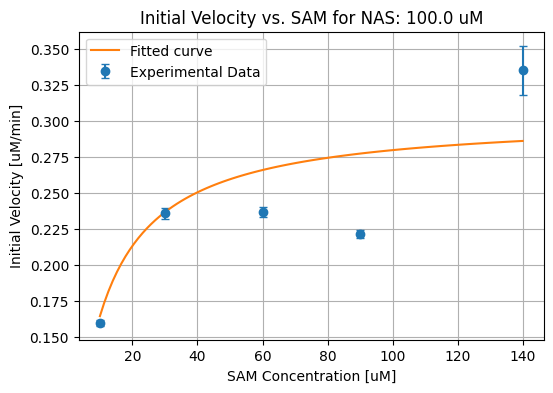

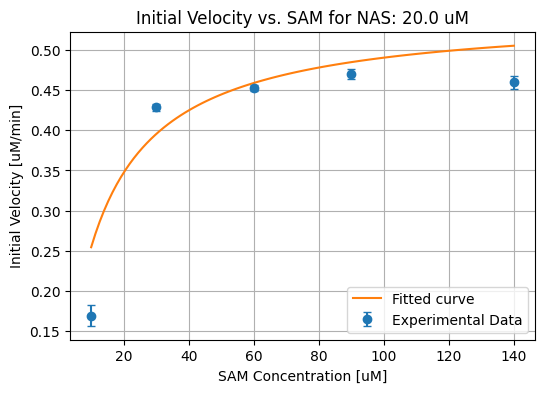

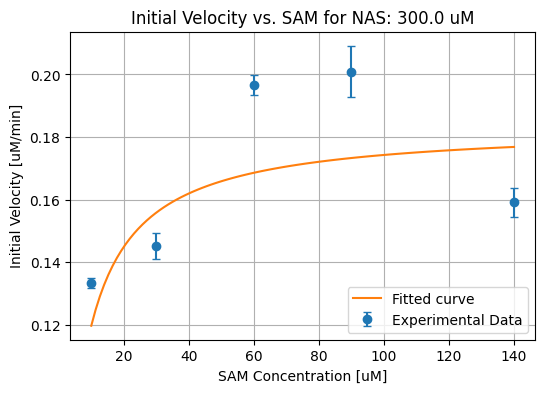

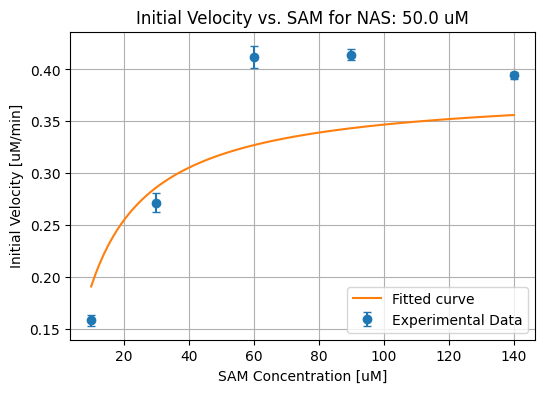

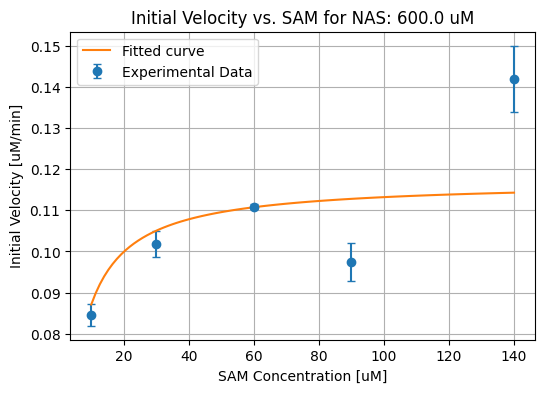

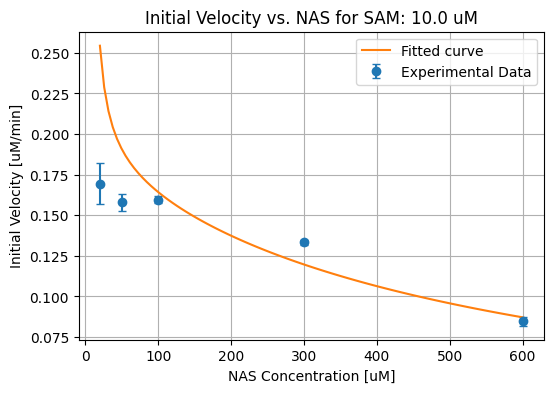

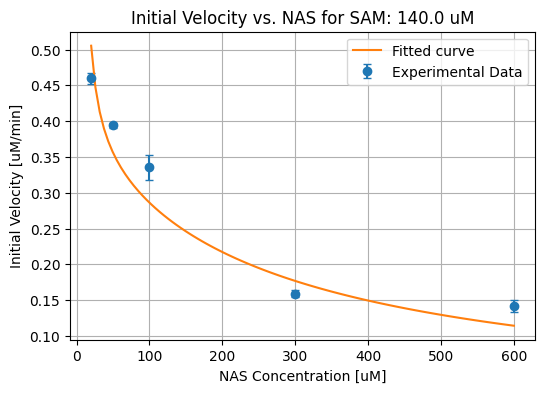

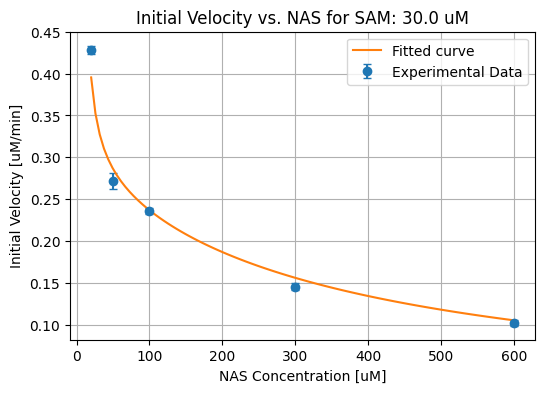

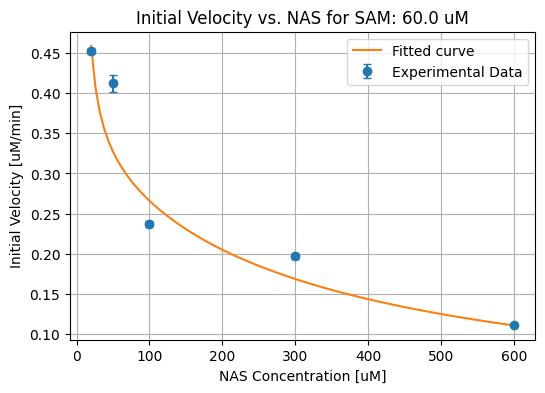

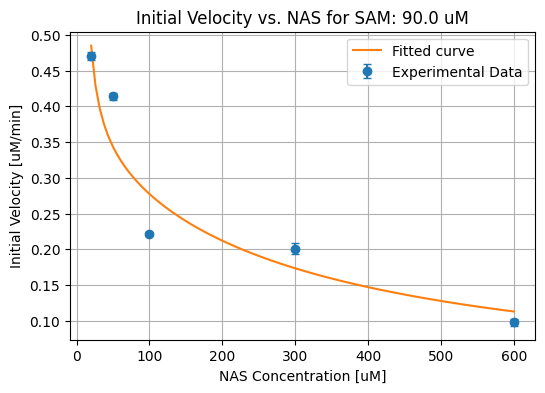

In [48]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the random sequential kinetic model with substrate inhibition by NAS^2
def random_sequential_inhibition_nas2(data, Vmax, Ks_SAM, K_SAM_NAS, K_NAS_SAM, Ki_NAS2):
    """
    Random sequential kinetic model with substrate inhibition by NAS^2.

    Args:
        data (tuple): A tuple containing arrays of SAM concentrations and NAS concentrations.
                      data[0] is SAM concentrations, data[1] is NAS concentrations.
        Vmax (float): Maximum reaction velocity.
        Ks_SAM (float): Dissociation constant for SAM from the enzyme.
        K_SAM_NAS (float): Complex kinetic parameter.
        K_NAS_SAM (float): Complex kinetic parameter.
        Ki_NAS2 (float): Inhibition constant for NAS^2.

    Returns:
        numpy.ndarray: Predicted initial velocities based on the model.
    """
    SAM = data[0]
    NAS = data[1]
    # Ensure SAM and NAS are numpy arrays for element-wise operations
    SAM = np.asarray(SAM)
    NAS = np.asarray(NAS)

    numerator = Vmax * SAM * NAS
    denominator = (Ks_SAM * K_SAM_NAS) + (K_SAM_NAS * SAM) + (K_NAS_SAM * NAS) + (SAM * NAS) + ((SAM * NAS**2) / Ki_NAS2)

    # Handle potential division by zero
    # Add a small epsilon to the denominator or handle inf/nan results later
    # For now, let's assume the denominator won't be zero with reasonable parameters and data
    # A more robust implementation might check for denominator == 0

    return numerator / denominator

# Prepare data for fitting
sam_concentrations_all = initial_velocities_df['SAM'].values
nas_concentrations_all = initial_velocities_df['NAS'].values
initial_velocities_all = initial_velocities_df['Initial Velocity [uM/min]'].values
velocity_errors_all = initial_velocities_df['Initial Velocity Standard Deviation [uM/min]'].values

data_for_fit = (sam_concentrations_all, nas_concentrations_all)

# Provide initial guesses for the parameters (Vmax, Ks_SAM, K_SAM_NAS, K_NAS_SAM, Ki_NAS2)
# These initial guesses are crucial for successful fitting and might need to be adjusted
# based on your understanding of the enzyme kinetics and preliminary data visualization.
initial_guess_rs_nas2 = [
    np.max(initial_velocities_all), # Vmax
    np.median(sam_concentrations_all), # Ks_SAM
    np.median(initial_velocities_all), # K_SAM_NAS
    np.median(initial_velocities_all), # K_NAS_SAM
    np.max(nas_concentrations_all) # Ki_NAS2
]

# Perform the curve fitting
try:
    popt_rs_nas2, pcov_rs_nas2 = curve_fit(
        random_sequential_inhibition_nas2,
        data_for_fit,
        initial_velocities_all,
        p0=initial_guess_rs_nas2,
        sigma=velocity_errors_all, # Use standard deviations as weights for fitting
        absolute_sigma=True, # Treat sigma as absolute errors
        maxfev=10000 # Increase maxfev for complex models
    )

    # Extract fitted parameters and their standard errors
    params_rs_nas2 = popt_rs_nas2
    perr_rs_nas2 = np.sqrt(np.diag(pcov_rs_nas2))

    # Print the fitted parameters and their standard errors
    param_names_rs_nas2 = ['Vmax', 'Ks_SAM', 'K_SAM_NAS', 'K_NAS_SAM', 'Ki_NAS2']
    print("Fitted Parameters for Random Sequential Model with NAS^2 Inhibition:")
    for i, param_name in enumerate(param_names_rs_nas2):
        print(f"{param_name}: {params_rs_nas2[i]:.4f} ± {perr_rs_nas2[i]:.4f}")

except RuntimeError as e:
    print(f"Could not fit the random sequential model with NAS^2 inhibition: {e}")
    popt_rs_nas2 = None
    pcov_rs_nas2 = None

# Visualize the fitted model (NAS-grouped)
if popt_rs_nas2 is not None:
    unique_nas_concentrations = initial_velocities_df['NAS'].unique()
    sam_fit_linspace = np.linspace(min(sam_concentrations_all), max(sam_concentrations_all), 100)

    for nas_conc in unique_nas_concentrations:
        filtered_df = initial_velocities_df[initial_velocities_df['NAS'] == nas_conc].copy()
        filtered_df = filtered_df.sort_values(by='SAM')

        sam_concentrations_exp = filtered_df['SAM'].values
        initial_velocities_exp = filtered_df['Initial Velocity [uM/min]'].values
        velocity_errors_exp = filtered_df['Initial Velocity Standard Deviation [uM/min]'].values

        plt.figure(figsize=(6, 4))
        plt.errorbar(sam_concentrations_exp, initial_velocities_exp, yerr=velocity_errors_exp, fmt='o', label='Experimental Data', capsize=3)

        sam_for_fit_curve = sam_fit_linspace
        nas_for_fit_curve = np.full_like(sam_fit_linspace, nas_conc)
        data_for_fit_curve = (sam_for_fit_curve, nas_for_fit_curve)

        velocity_fit_curve = random_sequential_inhibition_nas2(data_for_fit_curve, *popt_rs_nas2)
        plt.plot(sam_fit_linspace, velocity_fit_curve, '-', label=f'Fitted curve')

        plt.title(f'Initial Velocity vs. SAM for NAS: {nas_conc} uM')
        plt.xlabel('SAM Concentration [uM]')
        plt.ylabel('Initial Velocity [uM/min]')
        plt.legend()
        plt.grid(True)
        plt.show()

# Visualize the fitted model (SAM-grouped)
if popt_rs_nas2 is not None:
    unique_sam_concentrations = initial_velocities_df['SAM'].unique()
    nas_fit_linspace = np.linspace(min(nas_concentrations_all), max(nas_concentrations_all), 100)

    for sam_conc in unique_sam_concentrations:
        filtered_df = initial_velocities_df[initial_velocities_df['SAM'] == sam_conc].copy()
        filtered_df = filtered_df.sort_values(by='NAS')

        nas_concentrations_exp = filtered_df['NAS'].values
        initial_velocities_exp = filtered_df['Initial Velocity [uM/min]'].values
        velocity_errors_exp = filtered_df['Initial Velocity Standard Deviation [uM/min]'].values

        plt.figure(figsize=(6, 4))
        plt.errorbar(nas_concentrations_exp, initial_velocities_exp, yerr=velocity_errors_exp, fmt='o', label='Experimental Data', capsize=3)

        nas_for_fit_curve = nas_fit_linspace
        sam_for_fit_curve = np.full_like(nas_fit_linspace, sam_conc)
        data_for_fit_curve = (sam_for_fit_curve, nas_for_fit_curve)

        velocity_fit_curve = random_sequential_inhibition_nas2(data_for_fit_curve, *popt_rs_nas2)
        plt.plot(nas_fit_linspace, velocity_fit_curve, '-', label=f'Fitted curve ')

        plt.title(f'Initial Velocity vs. NAS for SAM: {sam_conc} uM')
        plt.xlabel('NAS Concentration [uM]')
        plt.ylabel('Initial Velocity [uM/min]')
        plt.legend()
        plt.grid(True)
        plt.show()

In [50]:
import numpy as np

# Check if the fitting was successful and parameters are available
if popt_rs_nas2 is not None:
    # Extract fitted parameters
    Vmax_fit, Ks_SAM_fit, K_SAM_NAS_fit, K_NAS_SAM_fit, Ki_NAS2_fit = popt_rs_nas2

    # Extract standard errors of fitted parameters
    perr_rs_nas2 = np.sqrt(np.diag(pcov_rs_nas2))
    Vmax_err, Ks_SAM_err, K_SAM_NAS_err, K_NAS_SAM_err, Ki_NAS2_err = perr_rs_nas2

    # Calculate Ks_NAS using the formula: Ks_NAS = (Ks_SAM * K_SAM_NAS) / K_NAS_SAM
    # Note: This calculation uses parameters from a model with substrate inhibition.
    # The interpretation of Ks_NAS derived this way should be done in the context of that specific model.
    Ks_NAS_calculated = (Ks_SAM_fit * K_SAM_NAS_fit) / K_NAS_SAM_fit

    # Calculate the standard error of Ks_NAS using error propagation for multiplication and division
    # Formula for error propagation of z = (a*b)/c:
    # (sigma_z / z)^2 = (sigma_a / a)^2 + (sigma_b / b)^2 + (sigma_c / c)^2
    # sigma_z = z * sqrt((sigma_a / a)^2 + (sigma_b / b)^2 + (sigma_c / c)^2)
    # Need to handle potential division by zero if any of the parameters are close to zero.
    try:
        relative_error_squared = (Ks_SAM_err / Ks_SAM_fit)**2 + (K_SAM_NAS_err / K_SAM_NAS_fit)**2 + (K_NAS_SAM_err / K_NAS_SAM_fit)**2
        Ks_NAS_calculated_err = Ks_NAS_calculated * np.sqrt(relative_error_squared)
    except ZeroDivisionError:
        Ks_NAS_calculated_err = np.nan # Cannot calculate error if any parameter is zero


    # Print the calculated Ks_NAS and its standard error
    print("Calculated Ks_NAS using parameters from the fitted inhibited model:")
    print(f"Ks_NAS: {Ks_NAS_calculated:.4f} uM")
    if not np.isnan(Ks_NAS_calculated_err):
        print(f"Standard Error of Ks_NAS: {Ks_NAS_calculated_err:.4f} uM")
    else:
        print("Could not calculate standard error for Ks_NAS due to parameter values close to zero.")

else:
    print("Random sequential model with NAS^2 inhibition fitting was not successful. Cannot calculate Ks_NAS.")

Calculated Ks_NAS using parameters from the fitted inhibited model:
Ks_NAS: -5.8248 uM
Standard Error of Ks_NAS: -1.4411 uM


In [51]:
# Calculate kcat from the fitted Vmax of the random sequential model with NAS^2 inhibition
# Check if the fitting was successful and Vmax is available
if popt_rs_nas2 is not None:
    # Extract fitted Vmax and its standard error
    Vmax_fit_rs_nas2 = popt_rs_nas2[0]
    perr_rs_nas2_Vmax = perr_rs_nas2[0]

    # Define total enzyme concentration in uM
    enzyme_concentration_uM = 2.0  # uM

    # Calculate kcat
    kcat_rs_nas2 = Vmax_fit_rs_nas2 / enzyme_concentration_uM

    # Calculate the standard deviation of kcat using error propagation (assuming enzyme concentration is exact)
    kcat_rs_nas2_std_err = perr_rs_nas2_Vmax / enzyme_concentration_uM

    # Print the calculated kcat and its standard deviation
    print("Calculated kcat from Random Sequential Model with NAS^2 Inhibition:")
    print(f"kcat: {kcat_rs_nas2:.4f} uM/min")
    print(f"Standard Deviation of kcat: {kcat_rs_nas2_std_err:.4f} uM/min")
else:
    print("Random sequential model with NAS^2 inhibition fitting was not successful. Cannot calculate kcat.")

Calculated kcat from Random Sequential Model with NAS^2 Inhibition:
kcat: 0.2053 uM/min
Standard Deviation of kcat: 0.0029 uM/min
